In [62]:
from pathlib import Path

import numpy as np
import arviz as az
import pymc as pm
import pandas as pd
import geopandas as gpd
import cufflinks as cf
import matplotlib.pyplot as plt
from libpysal.weights import Kernel

cf.go_offline()
data_dir = Path('../data/processed')
data = gpd.read_file(data_dir / 'spatial_income_1880.gpkg')
# print(data.loc[data.orthodox_proportion.isna()])
data.dropna(inplace=True)
W = Kernel.from_dataframe(data, fixed=True, bandwidth=150, function='quartic')

  (0, 0)	0.9375
  (0, 1)	0.8424329419323818
  (0, 2)	0.6620139783617185
  (0, 3)	0.5146154098499419
  (0, 4)	0.3555660909716288
  (0, 5)	0.6306441997112926
  (0, 6)	0.6907151289350288
  (0, 7)	0.7962038415069793
  (0, 8)	0.8783133849130287
  (0, 9)	0.5155590040052039
  (0, 10)	0.4100804784648299
  (0, 11)	0.3486346024038017
  (0, 12)	0.23777782720477675
  (0, 13)	0.06260234271035067
  (0, 15)	0.06949908868218481
  (0, 16)	0.10689174220148016
  (0, 17)	0.18043082331146182
  (0, 52)	0.7851535578780402
  (0, 53)	0.5849857275174749
  (0, 54)	0.33501786114516585
  (0, 55)	0.26246169255070123
  (0, 56)	0.5283034832659426
  (0, 57)	0.39869762070868486
  (0, 58)	0.14041409764934165
  (0, 59)	0.013265058846659638
  :	:
  (924, 904)	0.6163021887454925
  (924, 905)	0.5025694075488221
  (924, 906)	0.3632001619546906
  (924, 907)	0.24316877040909082
  (924, 908)	0.03523414039565196
  (924, 909)	0.009908107286268269
  (924, 918)	0.10565374860316076
  (924, 919)	0.10565374860316076
  (924, 920)	0.437

/home/antth/anaconda3/envs/socio-ethnic_segregation/lib/python3.10/site-packages/libpysal/weights/weights.py:172: UserWarning:

The weights matrix is not fully connected: 
 There are 5 disconnected components.



<AxesSubplot:>

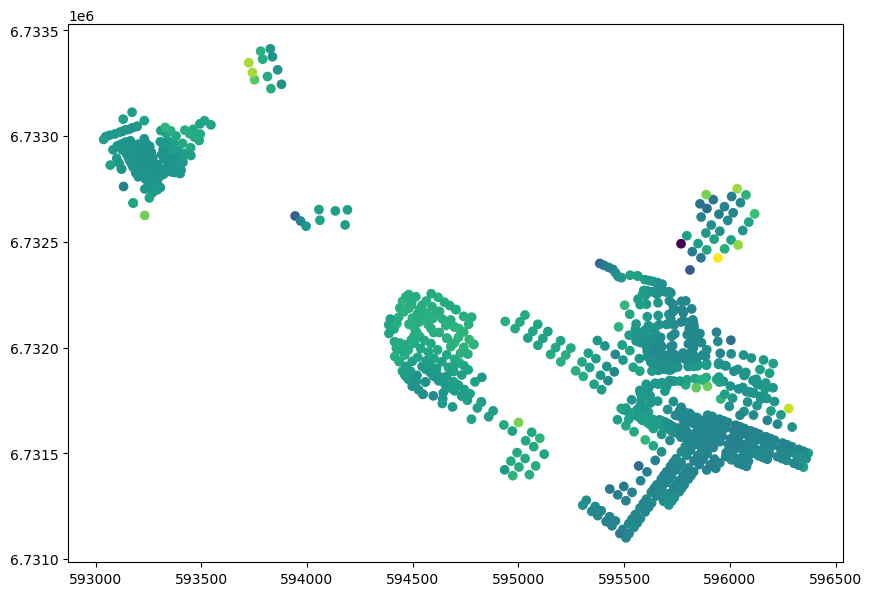

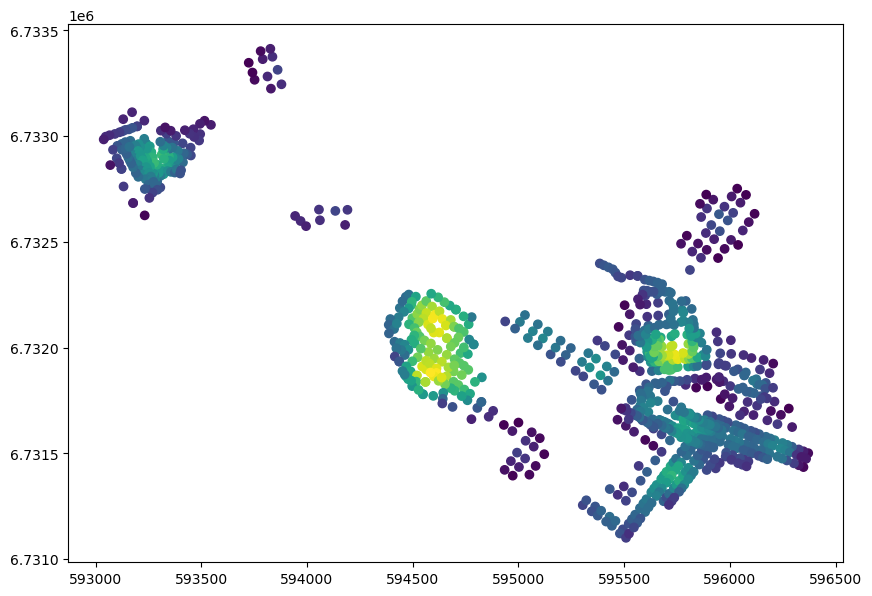

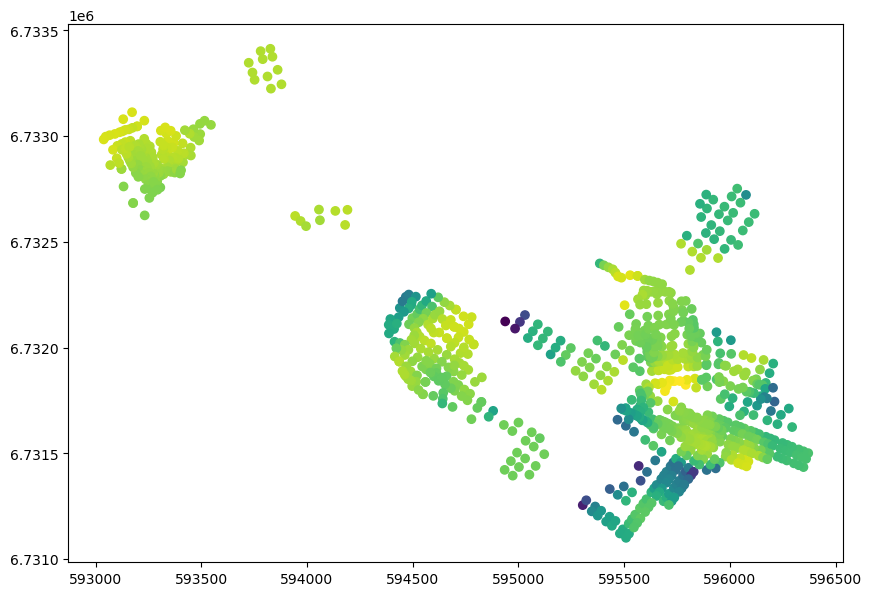

In [39]:
data.plot(column='income_per_capita_ln', figsize=(10,10))
data.plot(column='population', figsize=(10,10))
data.plot(column='orthodox_proportion_ln', figsize=(10,10))

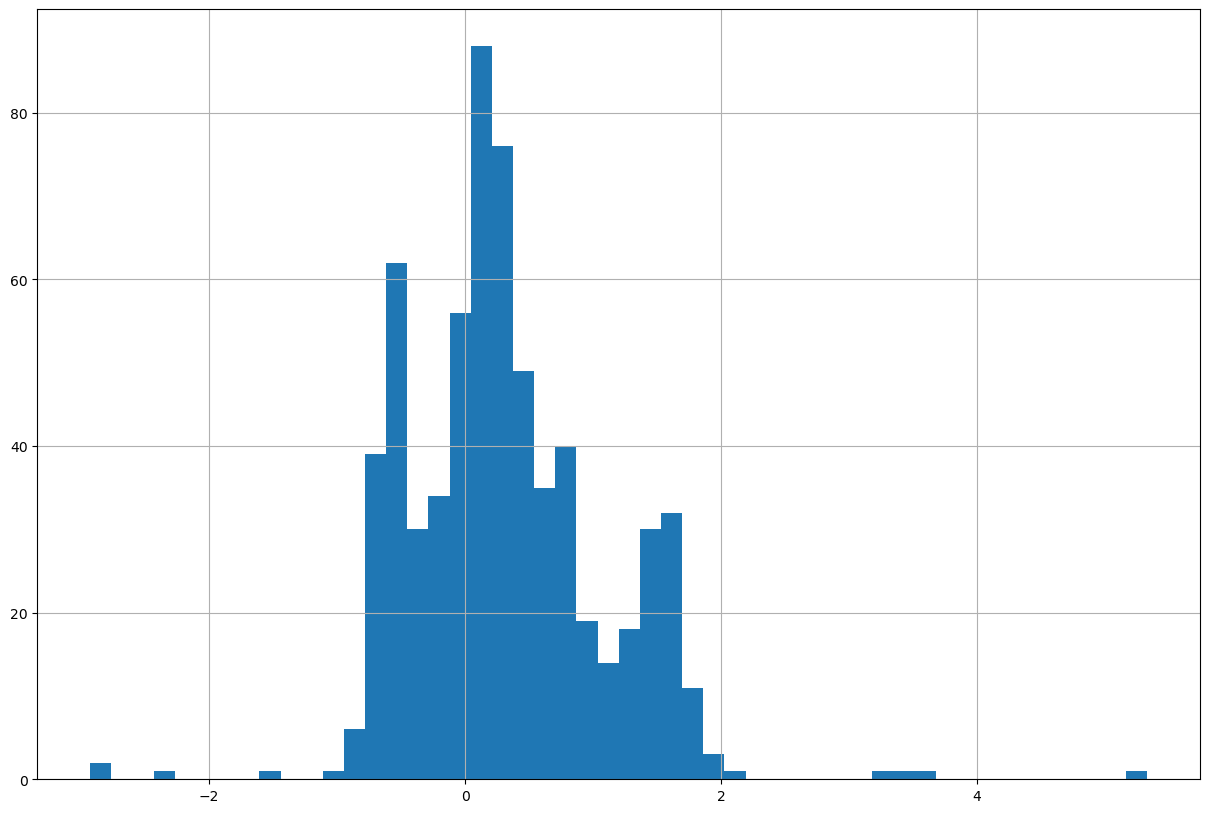

array([[<AxesSubplot:title={'center':'orthodox_proportion_ln'}>]],
      dtype=object)

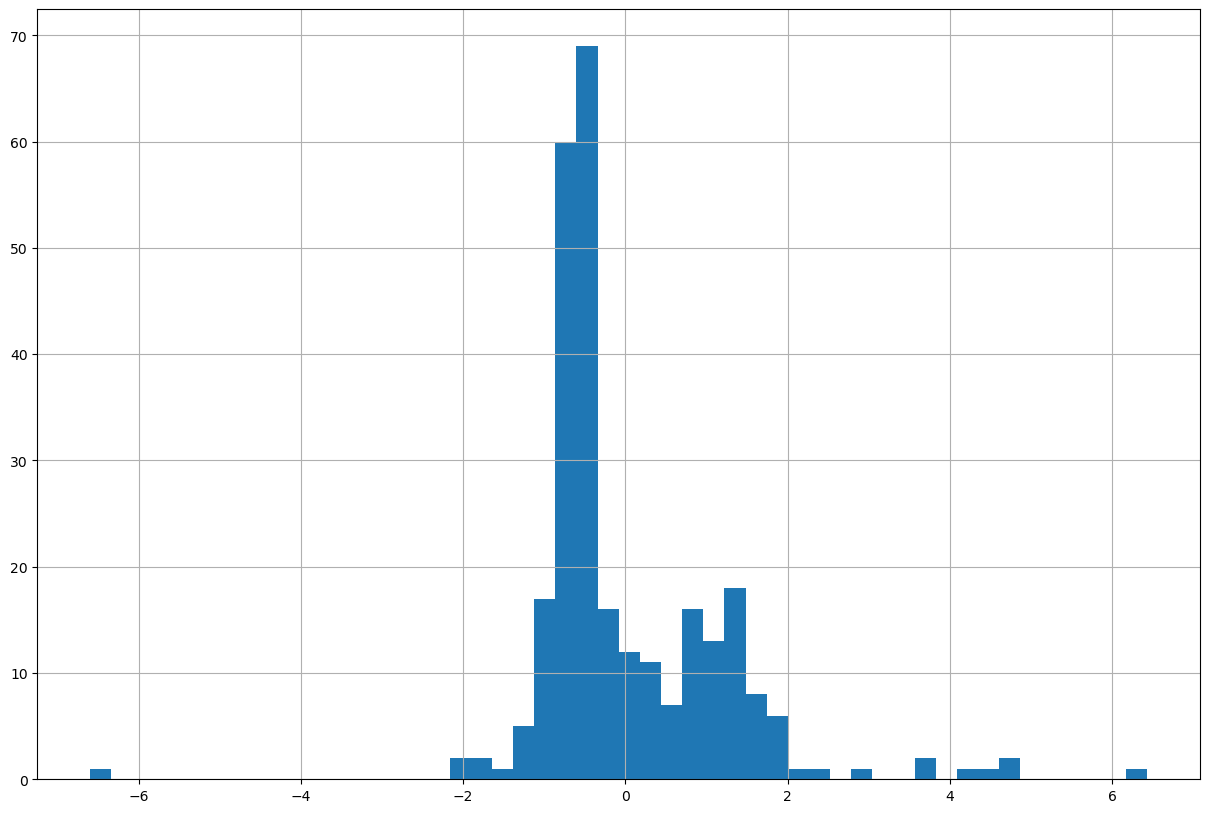

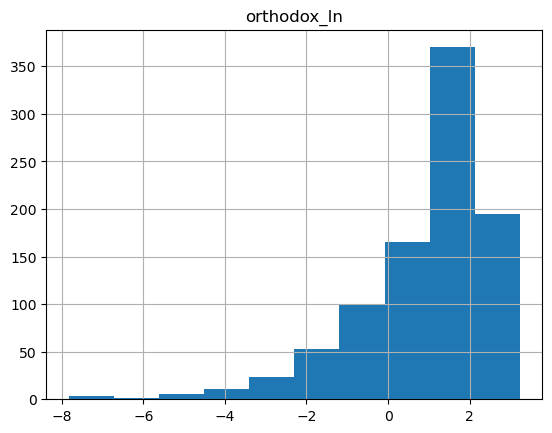

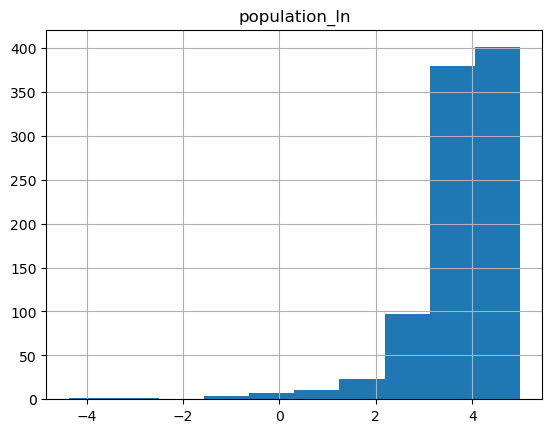

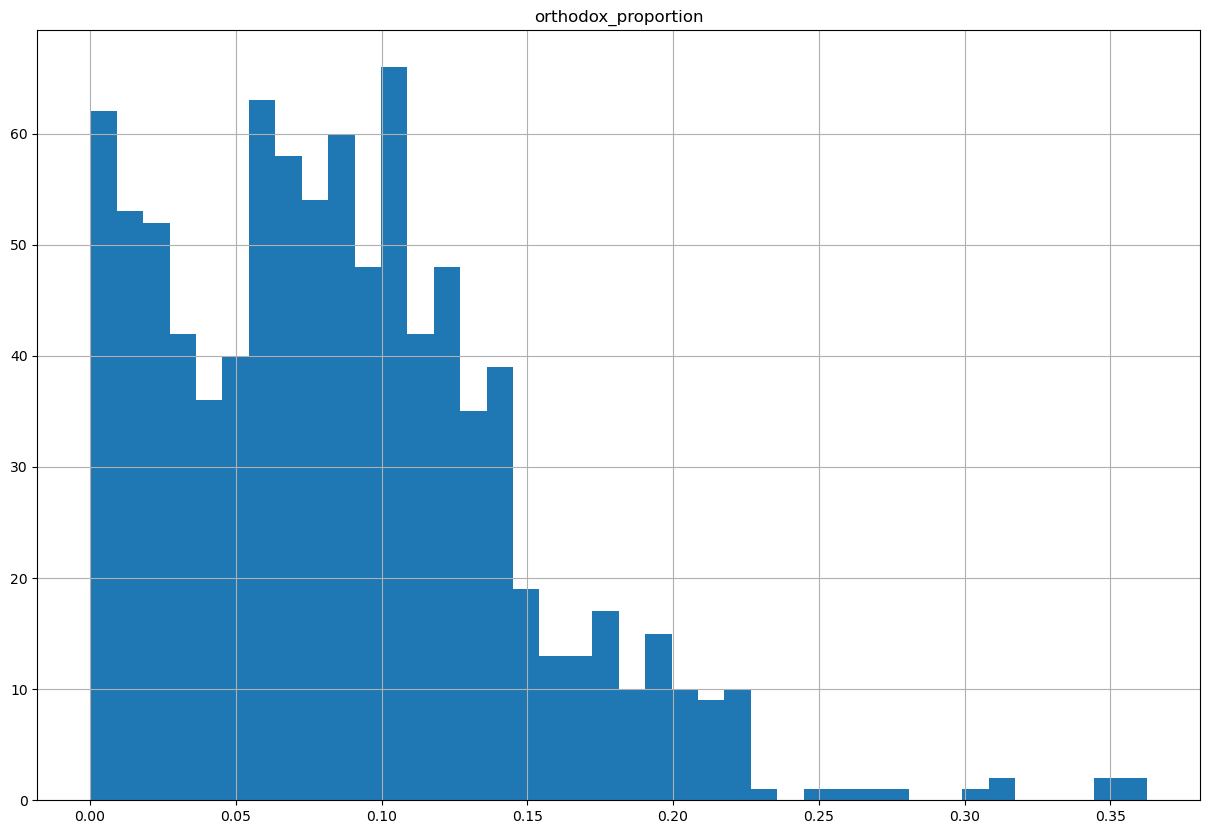

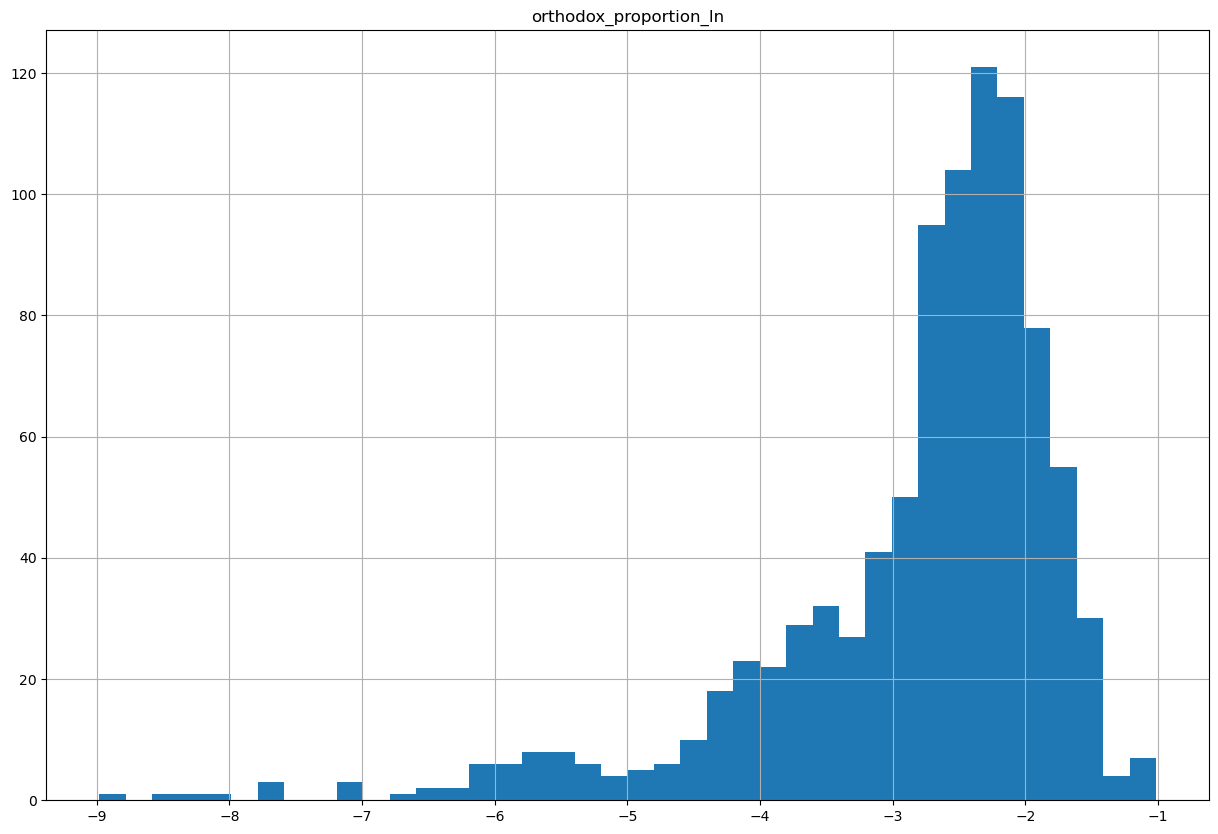

In [16]:
data.loc[data.is_old,'income_per_capita_ln'].hist(figsize=(15,10), bins=50)
plt.show()
data.loc[~data.is_old,'income_per_capita_ln'].hist(figsize=(15,10), bins=50)
data.hist(column='orthodox_ln')
data.hist(column='population_ln')
data.hist(column='orthodox_proportion', figsize=(15, 10), bins=40)
data.hist(column='orthodox_proportion_ln', figsize=(15, 10), bins=40)
# data.hist(column='orthodox')
# data.hist(column='lutheran')
# data.iplot(x='total_income', y='total_density', kind='scatter', mode='markers')

In [17]:
# with pm.Model() as model_1:
#     F = pm.ConstantData('F', data.is_old.astype('int'))
#
#     mu_beta_W = np.array([4, 1])
#     sigma_beta_W = np.array(np.diagflat([1, 1]))
#     beta_W = pm.MvNormal('beta_W', mu_beta_W, sigma_beta_W, shape=2)
#     sigma_W = pm.HalfNormal('sigma_W', sigma=1)
#     ln_W = pm.StudentT('ln_W', nu=1, mu=beta_W[0] + beta_W[1] * F, sigma=sigma_W, observed=data.total_income_ln)
#
#     mu_beta_O = np.array([0., 0., 0.])
#     mu_beta_L = np.array([0., 0., 0.])
#     sigma_beta_O = np.array(np.diagflat([0.25, 0.25, 0.25]))
#     sigma_beta_L = np.array(np.diagflat([0.25, 0.25, 0.25]))
#
#     beta_O = pm.MvNormal('beta_O', mu_beta_O, sigma_beta_O, shape=3)
#     beta_L = pm.MvNormal('beta_L', mu_beta_L, sigma_beta_L, shape=3)
#     sigma_O = pm.HalfNormal('sigma_O', 10)
#     sigma_L = pm.HalfNormal('sigma_L', 10)
#
#     O = pm.Normal('O', beta_O[0] + beta_O[1] * F + beta_O[2] * ln_W, sigma_O, observed=data.orthodox)
#     L = pm.Normal('L', beta_L[0] + beta_L[1] * F + beta_L[2] * ln_W, sigma_L, observed=data.lutheran)
#
#     prior = pm.sample_prior_predictive()
#     posterior = pm.sample(init="adapt_diag", return_inferencedata=True)
#     posterior_prediction = pm.sample_posterior_predictive(posterior)
#
# az.plot_posterior(posterior)
# az.plot_trace(posterior)
# az.plot_forest(posterior, combined=False, hdi_prob=0.94)
# pm.model_to_graphviz(model_1)

In [18]:
# with pm.Model() as model_2:
#     F = pm.ConstantData('F', data.is_old.astype('int'))
#
#     mu_beta_W = np.array([4, 1])
#     sigma_beta_W = np.array(np.diagflat([1, 1]))
#     beta_W = pm.MvNormal('beta_W', mu_beta_W, sigma_beta_W, shape=2)
#     sigma_W = pm.HalfNormal('sigma_W', sigma=1)
#     ln_W = pm.StudentT('ln_W', nu=1, mu=beta_W[0] + beta_W[1] * F, sigma=sigma_W, observed=data.total_income_ln)
#
#     mu_beta_O_prop = np.array([0.1, 0.1, 0.1])
#     mu_beta_P = np.array([0., 0., 0.])
#     sigma_beta_O_prop = np.array(np.diagflat([0.1, 0.1, 0.1]))
#     sigma_beta_P = np.array(np.diagflat([0.25, 0.25, 0.25]))
#
#     beta_O_prop = pm.MvNormal('beta_O_prop', mu_beta_O_prop, sigma_beta_O_prop, shape=3)
#     beta_P = pm.MvNormal('beta_P', mu_beta_L, sigma_beta_L, shape=3)
#     sigma_O_prop = pm.HalfNormal('sigma_O_prop', 0.05)
#     sigma_P = pm.HalfNormal('sigma_P', 50)
#     P = pm.Normal('P', beta_P[0] + beta_P[1] * F + beta_P[2] * ln_W, sigma_P, observed=data.population)
#
#     mu_O_prop = beta_O_prop[0] + beta_O_prop[1] * F + beta_O_prop[2] * ln_W
#     O_prop = pm.TruncatedNormal('O_prop', mu=mu_O_prop, sigma=sigma_O_prop, lower=0, upper=1, observed=data.orthodox_proportion)
#
#     prior = pm.sample_prior_predictive()
#     posterior = pm.sample(init="adapt_diag", return_inferencedata=True)
#     posterior_prediction = pm.sample_posterior_predictive(posterior)
#
# az.plot_posterior(posterior)
# az.plot_trace(posterior)
# az.plot_forest(posterior, combined=False, hdi_prob=0.94)
# pm.model_to_graphviz(model_2)

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_O, beta_P, sigma_O, sigma_P]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.


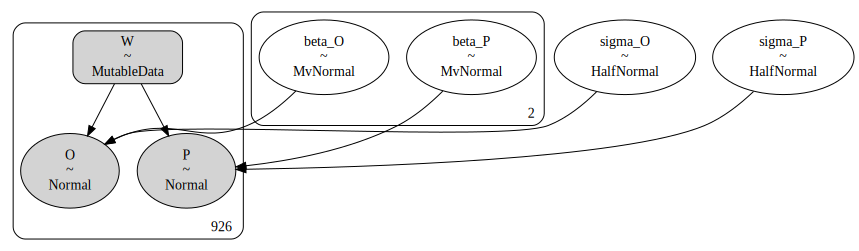

In [19]:
with pm.Model() as model_1:
    W = pm.MutableData('W', data.income_per_capita_ln)

    mu_beta_O_prop = np.array([0, 0])
    sigma_beta_O_prop = np.array(np.diagflat([0.1, 0.1]))

    mu_beta_P = np.array([0., 0.])
    sigma_beta_P = np.array(np.diagflat([0.1, 0.1]))

    beta_O_prop = pm.MvNormal('beta_O', mu_beta_O_prop, sigma_beta_O_prop, shape=2)
    beta_P = pm.MvNormal('beta_P', mu_beta_P, sigma_beta_P, shape=2)
    sigma_O_prop = pm.HalfNormal('sigma_O', 0.1)
    sigma_P = pm.HalfNormal('sigma_P', 0.1)

    P = pm.Normal('P', beta_P[0] + beta_P[1] * W, sigma_P, observed=data.population_ln)

    mu_O_prop = beta_O_prop[0] + beta_O_prop[1] * W
    O_prop = pm.Normal('O', mu=mu_O_prop, sigma=sigma_O_prop, observed=data.orthodox_proportion_ln)

    prior_1 = pm.sample_prior_predictive()
    posterior_1 = pm.sample(init="adapt_diag", return_inferencedata=True)
    posterior_prediction_1 = pm.sample_posterior_predictive(posterior_1)

graph_1 = pm.model_to_graphviz(model_1)
graph_1

array([<AxesSubplot:xlabel='P / P'>, <AxesSubplot:xlabel='O / O'>],
      dtype=object)

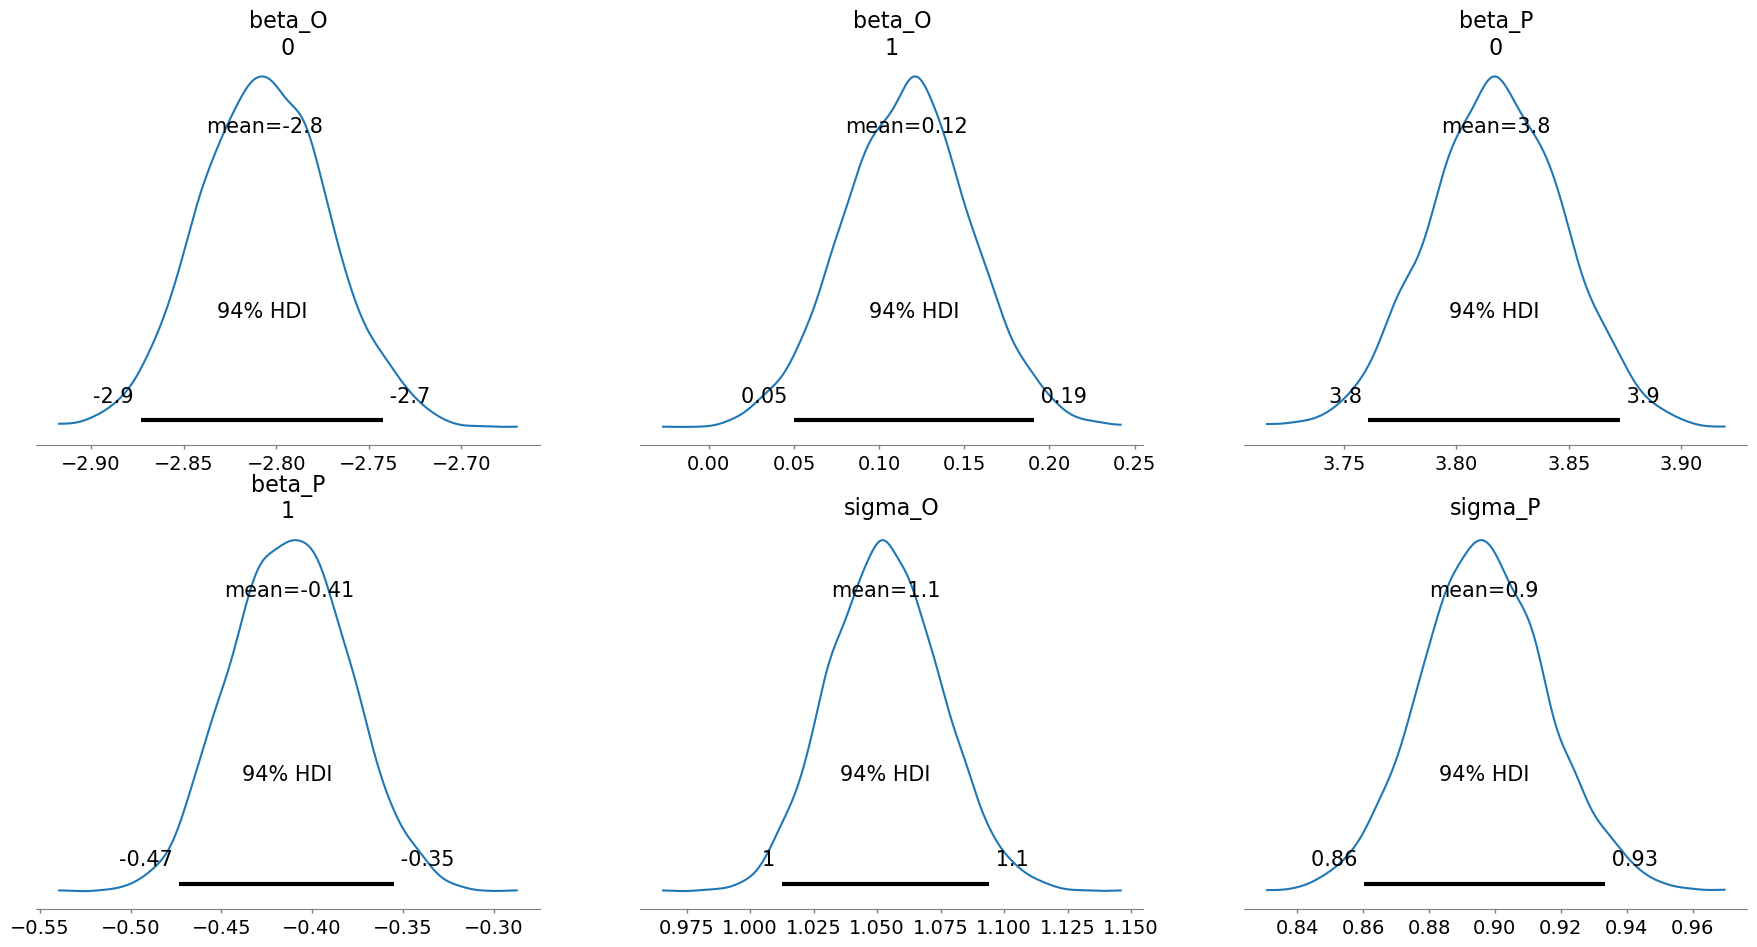

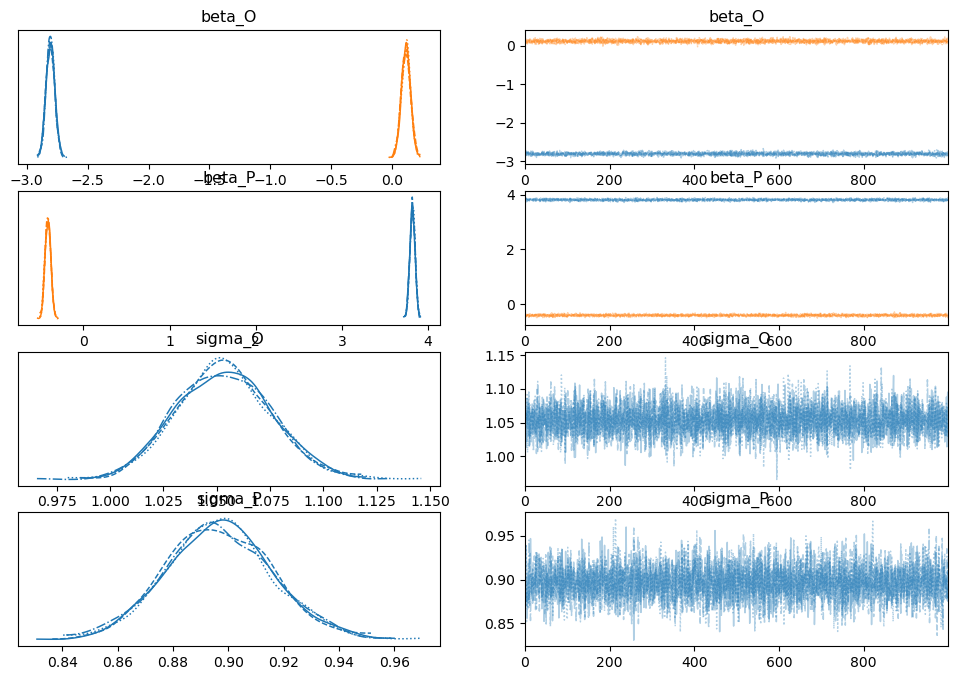

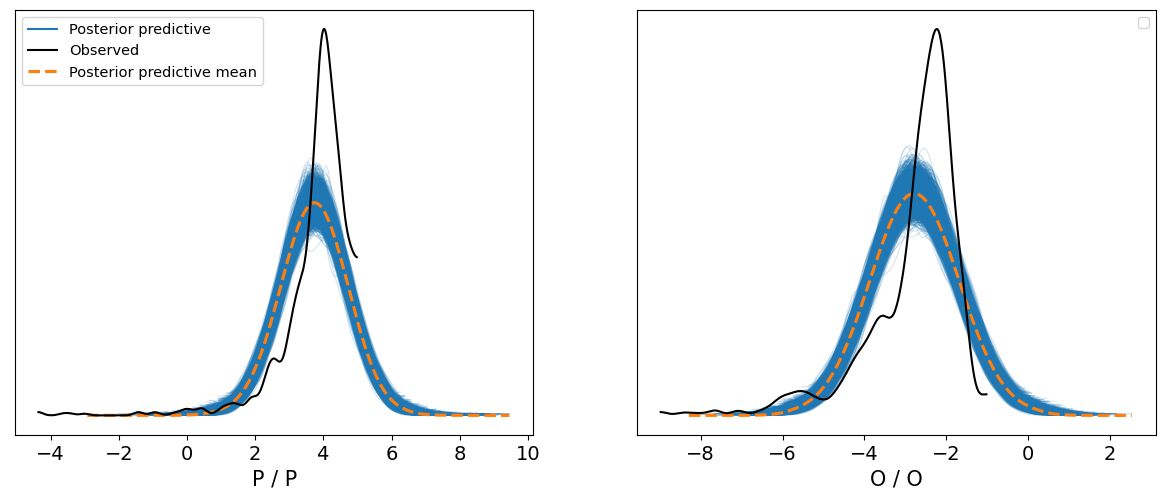

In [20]:
az.plot_posterior(posterior_1)
az.plot_trace(posterior_1)
# az.plot_forest(posterior_1, combined=False, hdi_prob=0.94)

az.plot_ppc(posterior_prediction_1)

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_W, sigma_W, beta_O, beta_P, sigma_O, sigma_P]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21 seconds.


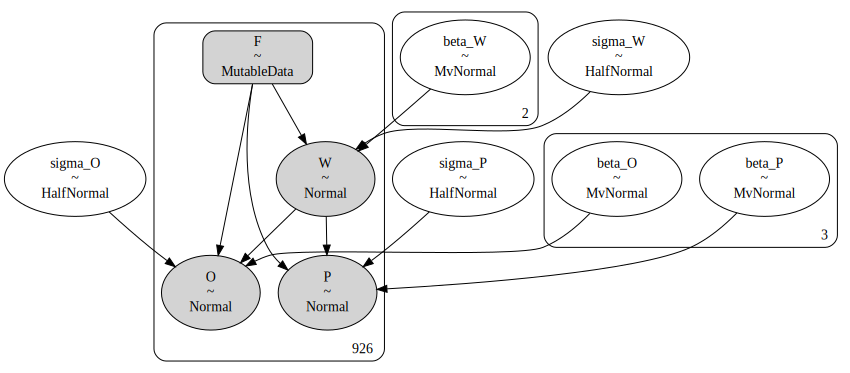

In [21]:
with pm.Model() as model_2:
    F = pm.MutableData('F', data.is_old.astype('int'))

    mu_beta_W = np.array([0, 0])
    sigma_beta_W = np.array(np.diagflat([1, 1]))
    beta_W = pm.MvNormal('beta_W', mu_beta_W, sigma_beta_W, shape=2)
    sigma_W = pm.HalfNormal('sigma_W', sigma=1)
    W = pm.Normal('W', mu=beta_W[0] + beta_W[1] * F, sigma=sigma_W, observed=data.income_per_capita_ln)

    mu_beta_O_prop = np.array([0, 0, 0])
    sigma_beta_O_prop = np.array(np.diagflat([0.1, 0.1, 0.1]))

    mu_beta_P = np.array([0., 0., 0.])
    sigma_beta_P = np.array(np.diagflat([0.1, 0.1, 0.1]))

    beta_O_prop = pm.MvNormal('beta_O', mu_beta_O_prop, sigma_beta_O_prop, shape=3)
    beta_P = pm.MvNormal('beta_P', mu_beta_P, sigma_beta_P, shape=3)
    sigma_O_prop = pm.HalfNormal('sigma_O', 0.1)
    sigma_P = pm.HalfNormal('sigma_P', 0.1)

    P = pm.Normal('P', beta_P[0] + beta_P[1] * F + beta_P[2] * W, sigma_P, observed=data.population_ln)

    mu_O_prop = beta_O_prop[0] + beta_O_prop[1] * F + beta_O_prop[2] * W
    O_prop = pm.Normal('O', mu=mu_O_prop, sigma=sigma_O_prop, observed=data.orthodox_proportion_ln)

    prior_2 = pm.sample_prior_predictive()
    posterior_2 = pm.sample(init="adapt_diag", return_inferencedata=True)
    posterior_prediction_2 = pm.sample_posterior_predictive(posterior_2)

graph_2 = pm.model_to_graphviz(model_2)
graph_2

array([<AxesSubplot:xlabel='W / W'>, <AxesSubplot:xlabel='P / P'>,
       <AxesSubplot:xlabel='O / O'>], dtype=object)

/home/antth/anaconda3/envs/socio-ethnic_segregation/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



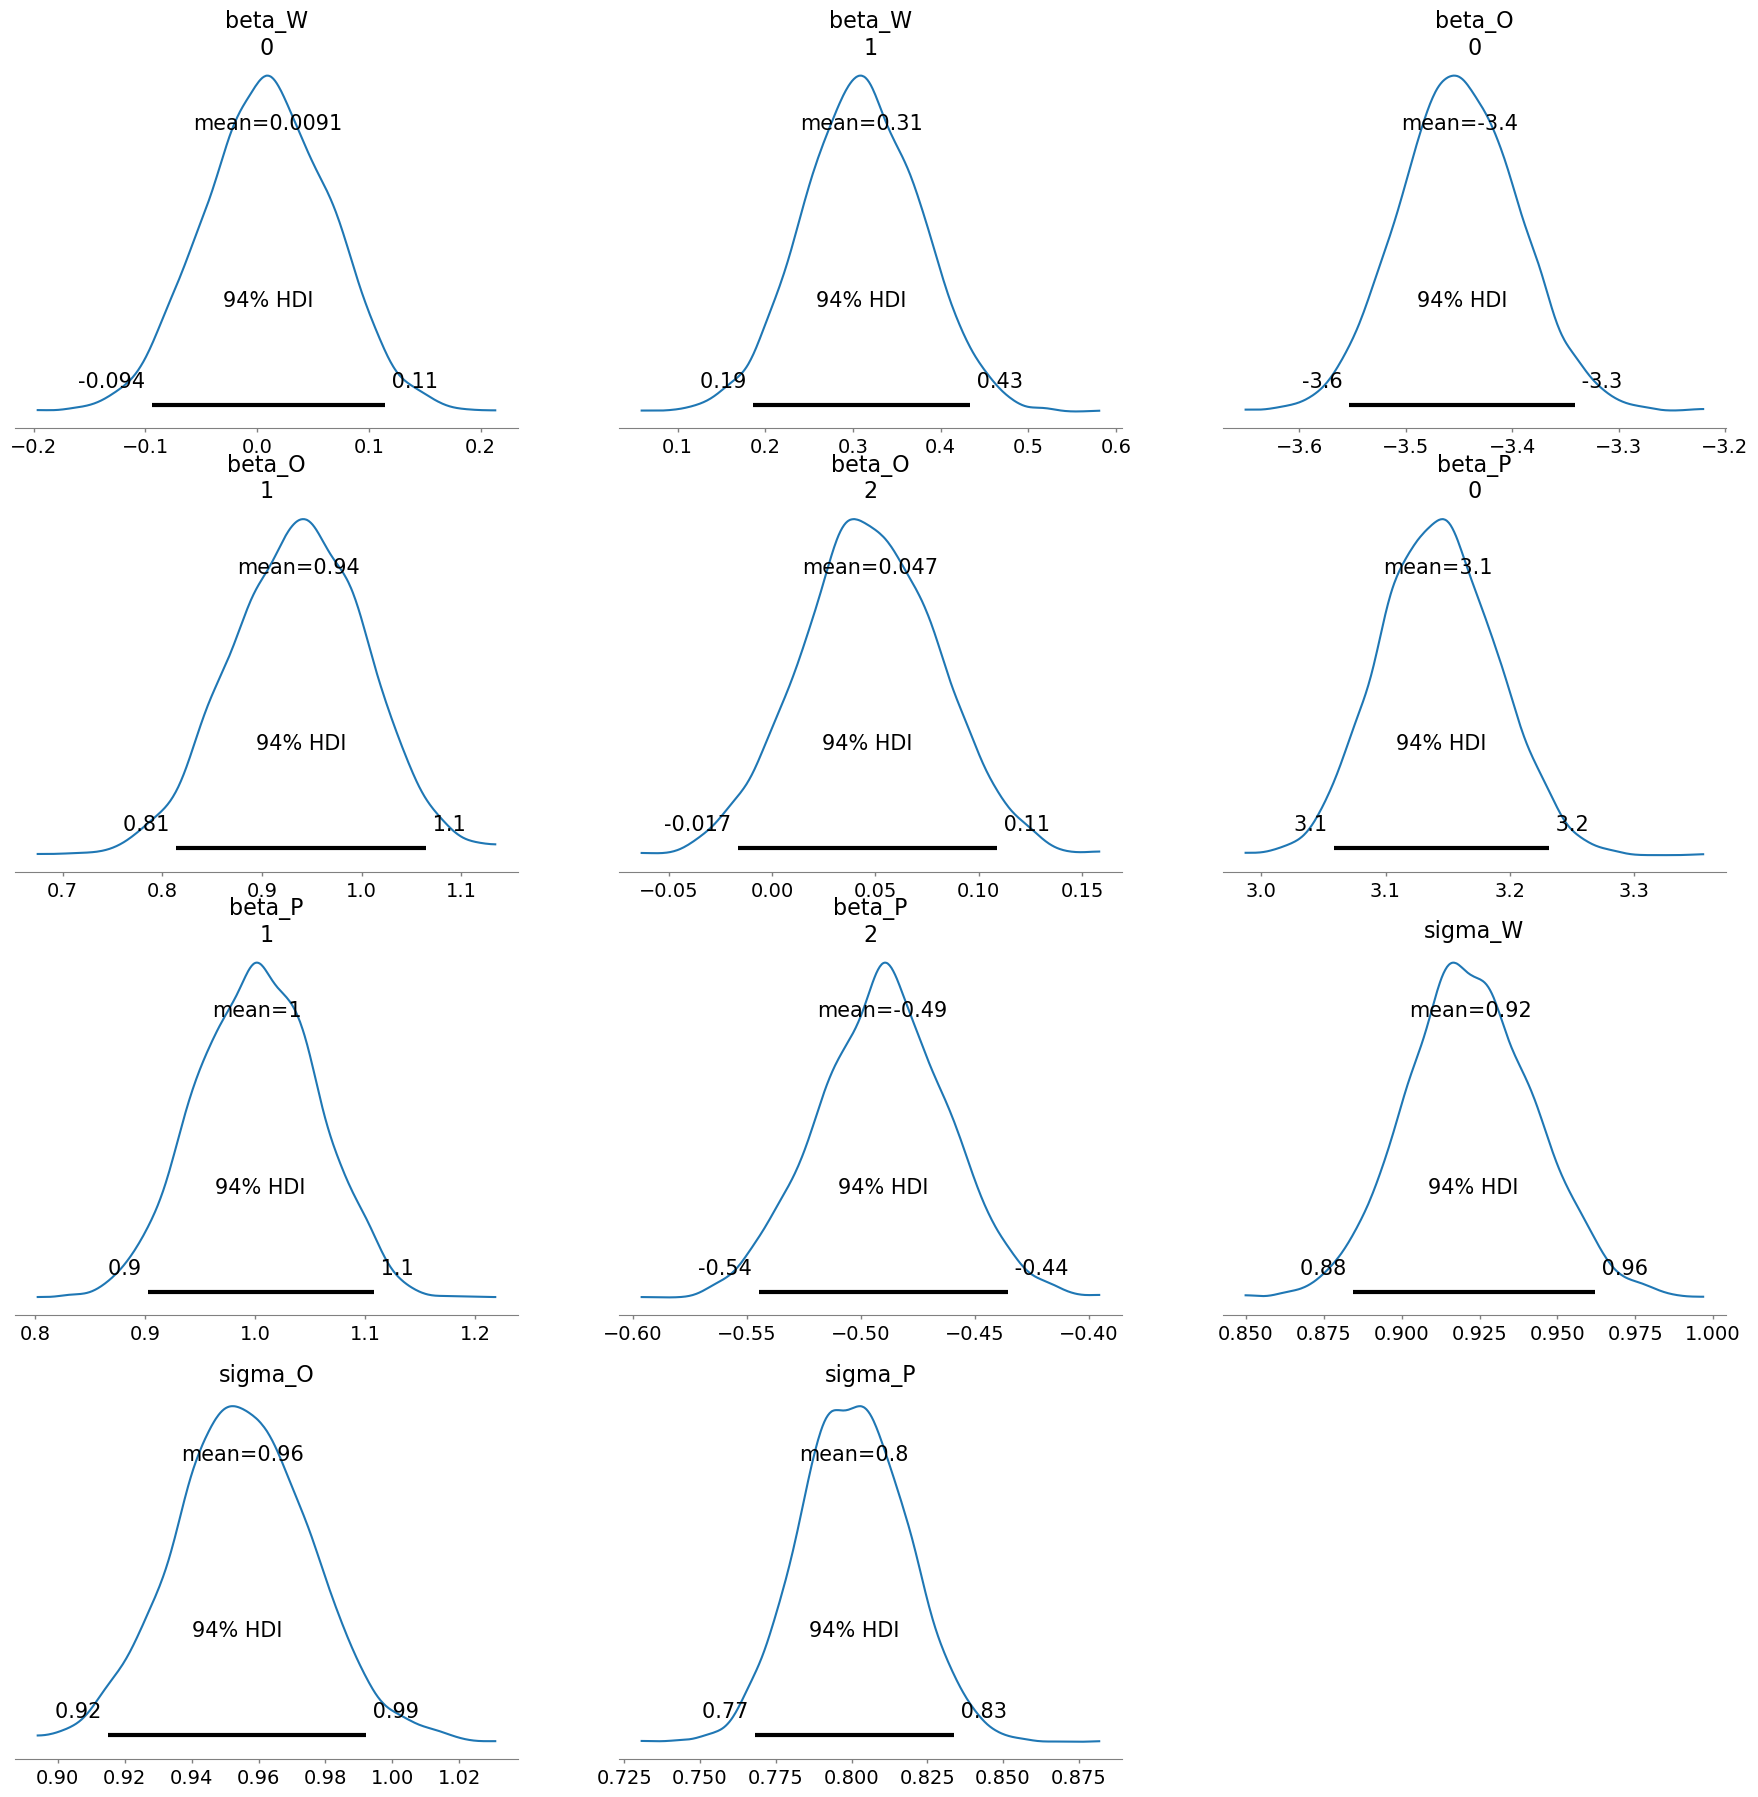

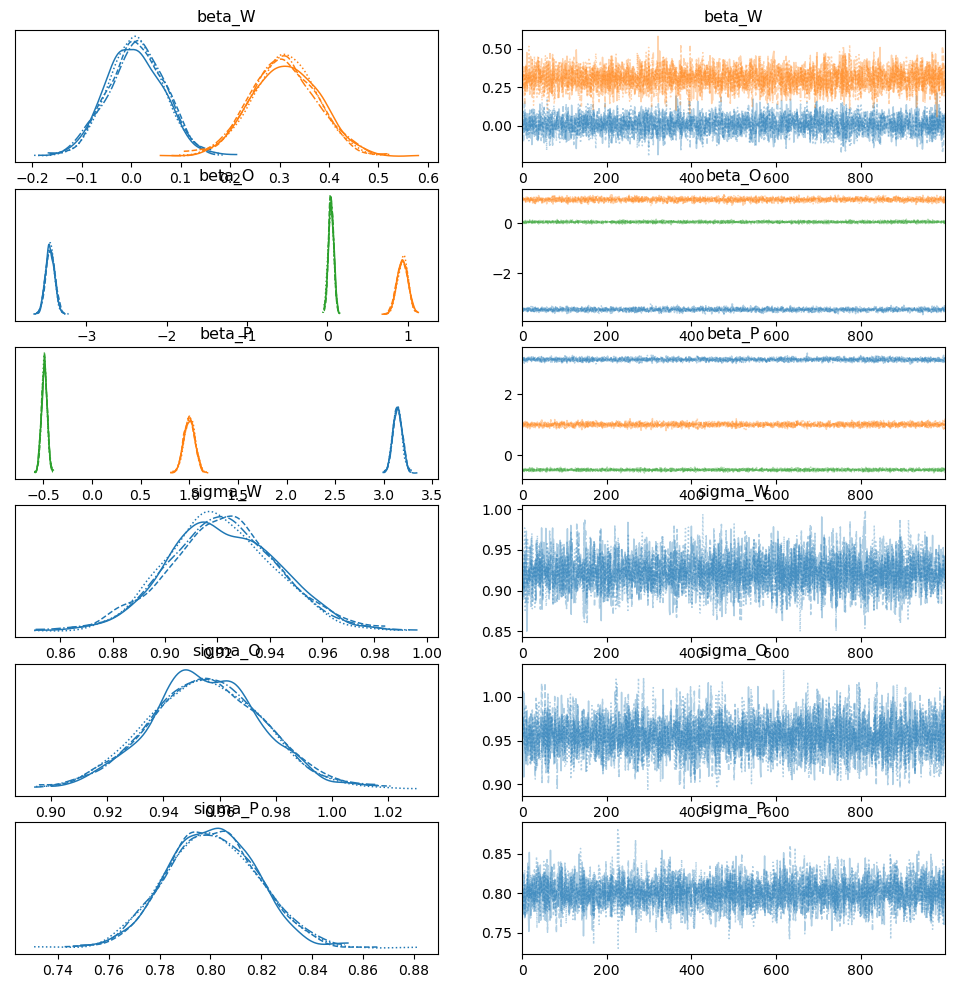

/home/antth/anaconda3/envs/socio-ethnic_segregation/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



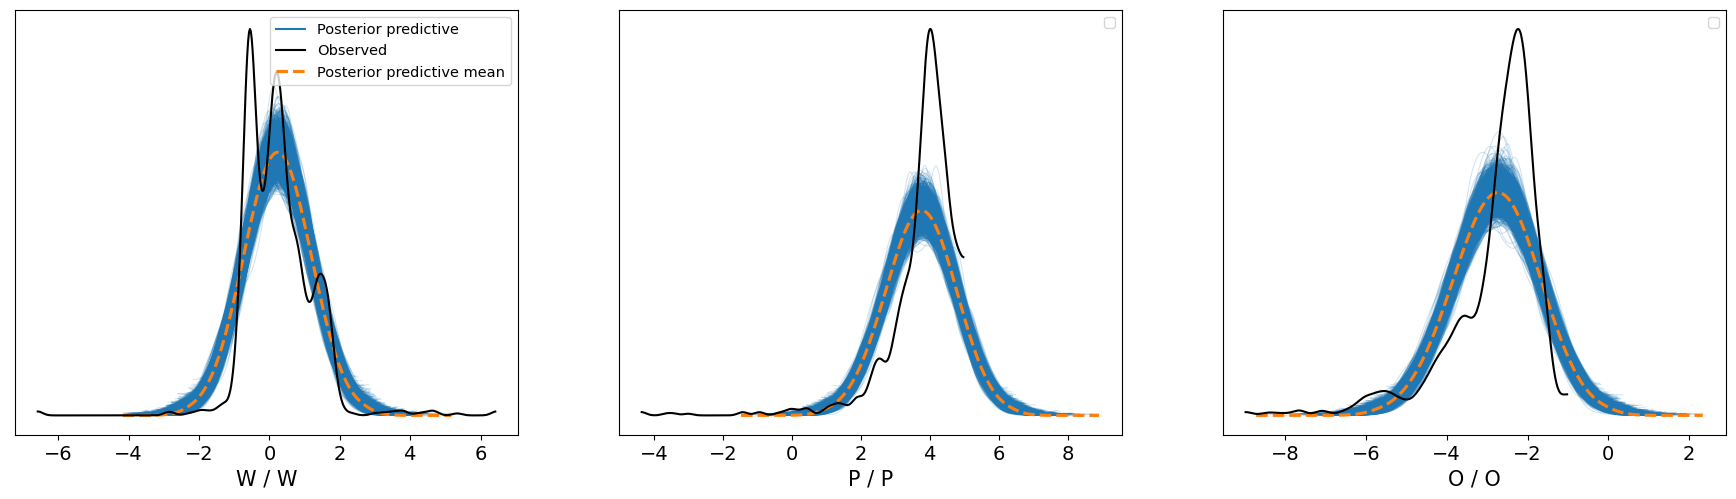

In [22]:
az.plot_posterior(posterior_2)
az.plot_trace(posterior_2)
# az.plot_forest(posterior_2, combined=False, hdi_prob=0.94)

az.plot_ppc(posterior_prediction_2)

<AxesSubplot:>

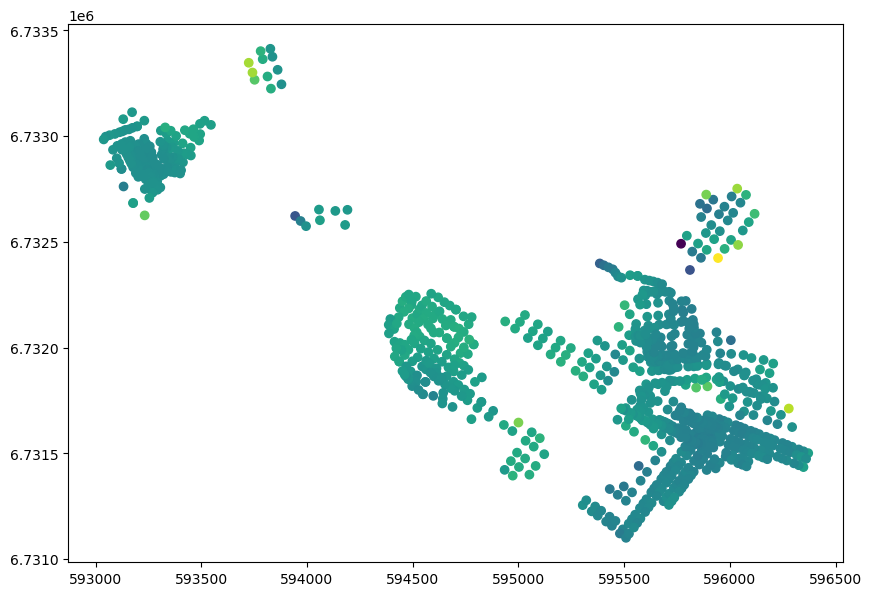

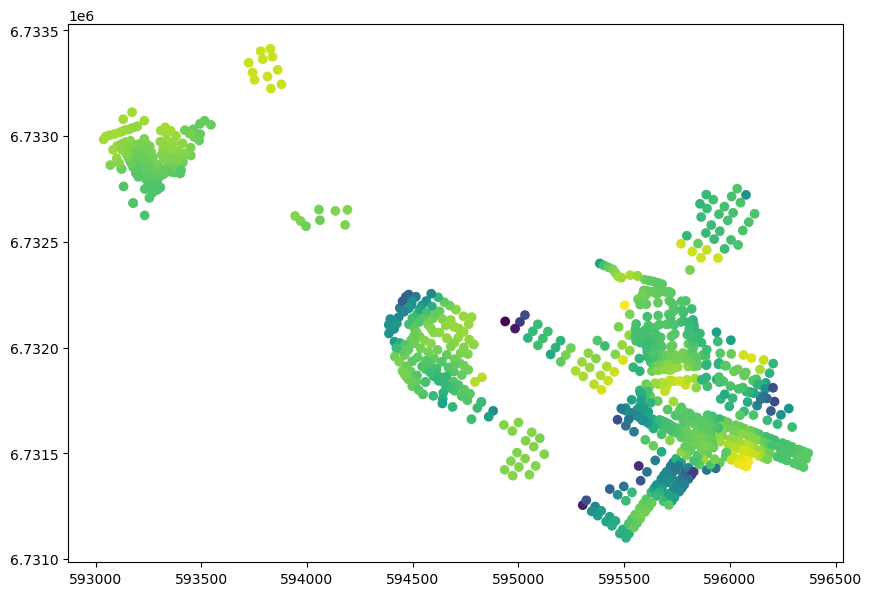

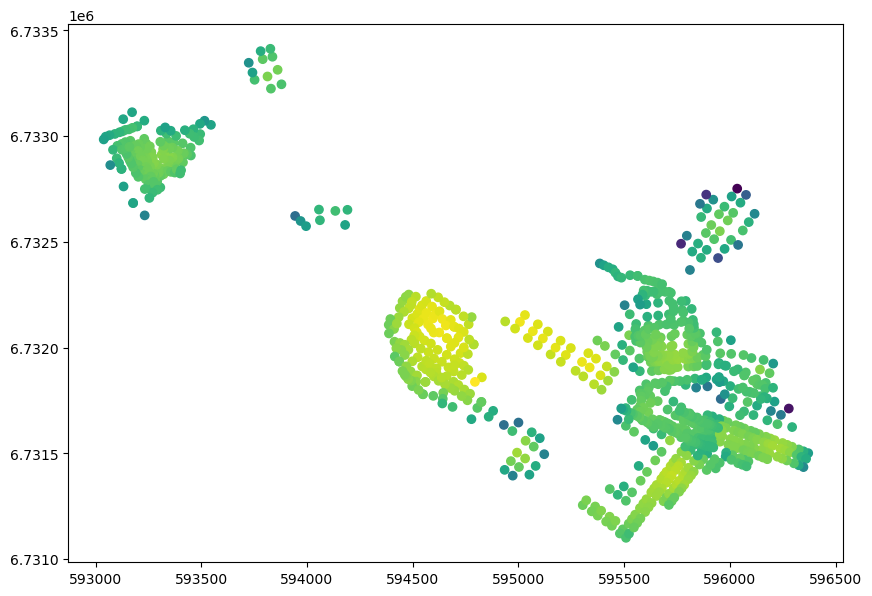

In [42]:
# "Residuals"

data['W_residual'] = data.income_per_capita_ln - 0.31 * data.is_old
data.plot(column='W_residual', figsize=(10, 10))

data['O_residual'] = data.orthodox_proportion_ln - (-3.4 + 0.94 * data.is_old)
data.plot(column='O_residual', figsize=(10, 10))

data['P_residual'] = data.population_ln - (3.1 + data.is_old - 0.49 * data.income_per_capita_ln)
data.plot(column='P_residual', figsize=(10, 10))